In [1]:
# https://hub.arcgis.com/pages/a0db1c6905934fb5a522137f0fec6c7b
# https://spatialvision.com.au/blog-open-source-spatial-geopandas-part-1/

import geopandas as gpd
# folium

In [12]:
# bbbike -> shape files
# landuse.shp
# natural
# places
# points
# railways
# roads
# waterways
# buildings
unicamp_df = gpd.read_file('unicamp/shape/buildings.shp')
unicamp_df.head()

,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


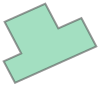

In [3]:
unicamp_df.geometry.iloc[0]

In [4]:
unicamp_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

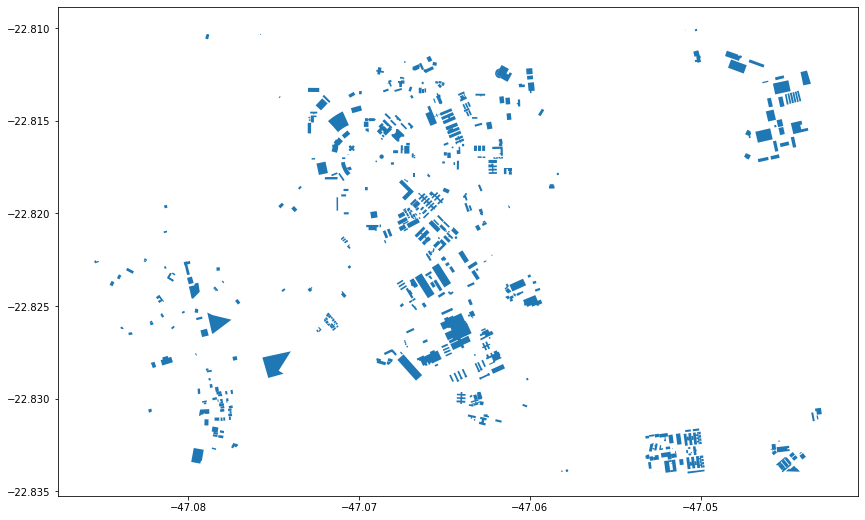

In [13]:
ax = unicamp_df.plot(figsize=(17, 9))

,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."


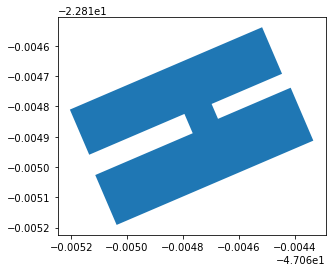

In [6]:
melb = unicamp_df.query('osm_id == 95011169')
ax = melb.plot()
melb.head()


In [7]:
cpr_gdf= unicamp_df.to_crs({'init': 'epsg:3174'})  
buffer_length_in_meters = (5 * 1000) * 1.60934
cpr_gdf['geometry'] = cpr_gdf.geometry.buffer(buffer_length_in_meters)

/home/wasp/anaconda3/envs/coleta_residuos/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((6748310.058 -4202527.852, 6747585.41..."


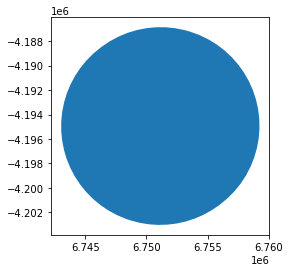

In [8]:
melb = cpr_gdf.query('osm_id == 95011169')
ax = melb.plot()
melb.head()

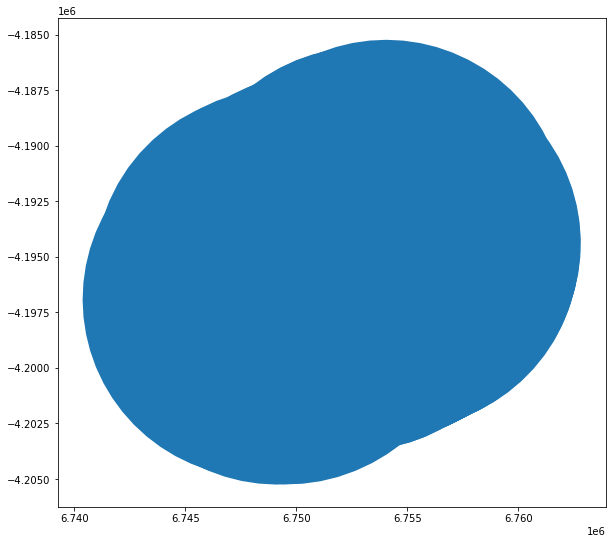

In [14]:
ax = cpr_gdf.plot(figsize=(17, 9))